In [5]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

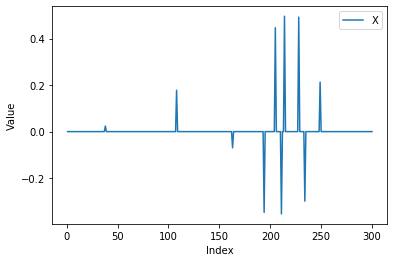

In [135]:
f_s = 10  # number of frquencies
N=300 #Number of overall measurements

Amps=np.random.rand(f_s)-0.5
Indices=np.random.randint(0,N,f_s)
x = np.zeros(N)
ctr=0
for i in Indices:
    x[i]=Amps[ctr]
    ctr+=1
plt.figure()
plt.plot(np.linspace(1,N,N), x, '-',label='X')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [136]:
Signal=np.fft.ifft(x)

In [137]:
len(Signal)

300

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


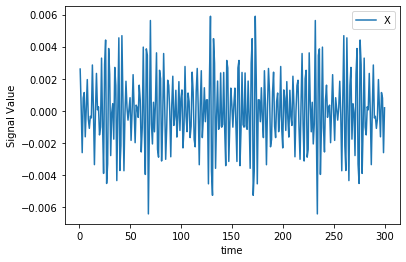

In [138]:
plt.figure()
plt.plot(np.linspace(1,N,N),Signal, '-',label='X')
plt.xlabel('time')
plt.ylabel('Signal Value')
plt.legend()
plt.show()

In [139]:
A=np.zeros([N,N],complex)
for i in range(N):
    for j in range(N):
        A[i,j]=1/N*np.exp(2*np.pi*i*j*np.complex(0,1)/N)

In [140]:
Y=np.dot(A,x)

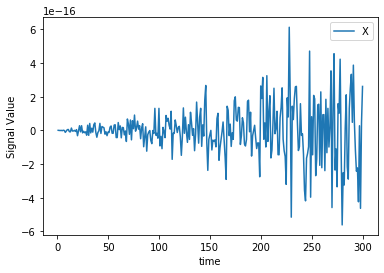

In [141]:
plt.figure()
plt.plot(np.linspace(1,N,N),np.abs(Y)-np.abs(Signal), '-',label='X')
plt.xlabel('time')
plt.ylabel('Signal Value')
plt.legend()
plt.show()

In [142]:
m = 30  # number of measurements

A_m=np.zeros([m,N],complex)
Indices=np.random.randint(0,N,m)
ctr=0
for i in Indices:
    for j in range(N):
        A_m[ctr,j]=A[i,j]
    ctr+=1

In [143]:
y=np.dot(A_m,x)

In [144]:
from sklearn import linear_model

In [145]:
#a, b, coeffs = linear_model.lars_path(A_m,y,method='lasso', verbose=True)

In [146]:
Ac=np.array([[np.complex(1,1),np.complex(2,-1)],[np.complex(3,1),np.complex(4,-1)]])
bc=np.array([[np.complex(1,1)],[np.complex(0,1)]])

In [147]:
print(Ac,'\n',bc,'\n',np.dot(Ac,bc))
Ac_real=A_Complex2Real(Ac)
Bc_real=b_Complex2Real(bc)
print(np.dot(A_Complex2Real(Ac),b_Complex2Real(bc)))

[[1.+1.j 2.-1.j]
 [3.+1.j 4.-1.j]] 
 [[1.+1.j]
 [0.+1.j]] 
 [[1.+4.j]
 [3.+8.j]]
[1. 4. 3. 8.]


In [150]:
def A_Complex2Real(A):
    A_real=np.empty([2*A.shape[0],2*A.shape[1]])
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            A_real[2*i,2*j]=A[i,j].real
            A_real[2*i+1,2*j+1]=A[i,j].real
            A_real[2*i,2*j+1]=-A[i,j].imag
            A_real[2*i+1,2*j]=A[i,j].imag
    return A_real
def b_Complex2Real(b):
    b_real=np.empty(2*b.shape[0])
    for i in range(b.shape[0]):
        b_real[2*i]=b[i].real        
        b_real[2*i+1]=b[i].imag
    return b_real
def b_Real2Complex(b):
    if len(b)%2==1:
        return "Not a valid vector"
    b_complex=np.empty(int(b.shape[0]/2),complex)
    for i in range(b_complex.shape[0]):
        b_complex[i]=complex(b[2*i],b[2*i+1])
    return b_complex

In [151]:
A_m_real=A_Complex2Real(A_m) 
y_real=b_Complex2Real(y)

In [171]:
%time
a, b, coeffs = linear_model.lars_path(A_m_real,y_real,method='lasso',eps=1e-18, verbose=True)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs
.

In [164]:
BB=b_Real2Complex(coeffs[:,-1])

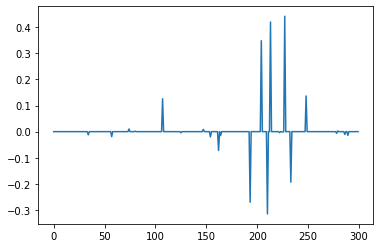

In [165]:
plt.plot(BB)
plt.show()

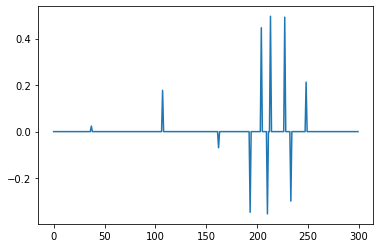

In [166]:
plt.plot(x)
plt.show()